# Imports and Data Exploration

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import itertools
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.ensemble import StackingClassifier

from tqdm.notebook import tqdm
import optuna

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('./data/playground-series-s5e2/train.csv').set_index('id')
train.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
id,,,,,,,,,,
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [3]:
# Uniques
print("Number of Unique values : \n")
for col in train.columns:
    print(f'{col} ----> {train[col].nunique()}\n')

Number of Unique values : 

Brand ----> 5

Material ----> 4

Size ----> 3

Compartments ----> 10

Laptop Compartment ----> 2

Waterproof ----> 2

Style ----> 3

Color ----> 6

Weight Capacity (kg) ----> 181596

Price ----> 48212



In [4]:
# NaNs
print("% of NaN values : \n")
for col in train.columns:
    print(f'{col} ----> {(train[col].isna().sum()/len(train)*100):.2f} %\n')

% of NaN values : 

Brand ----> 3.23 %

Material ----> 2.78 %

Size ----> 2.20 %

Compartments ----> 0.00 %

Laptop Compartment ----> 2.48 %

Waterproof ----> 2.35 %

Style ----> 2.66 %

Color ----> 3.32 %

Weight Capacity (kg) ----> 0.05 %

Price ----> 0.00 %



In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 0 to 299999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Brand                 290295 non-null  object 
 1   Material              291653 non-null  object 
 2   Size                  293405 non-null  object 
 3   Compartments          300000 non-null  float64
 4   Laptop Compartment    292556 non-null  object 
 5   Waterproof            292950 non-null  object 
 6   Style                 292030 non-null  object 
 7   Color                 290050 non-null  object 
 8   Weight Capacity (kg)  299862 non-null  float64
 9   Price                 300000 non-null  float64
dtypes: float64(3), object(7)
memory usage: 25.2+ MB


In [6]:
train.duplicated().sum()

0

# EDA

## Univariate

(150.0, 15.0)

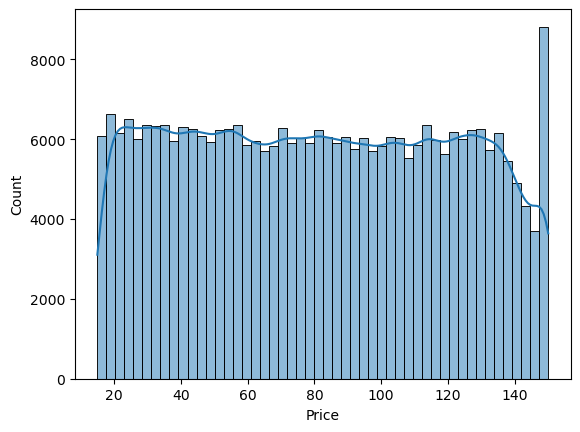

In [7]:
sns.histplot(data=train, x='Price', kde=True, bins=50);
max(train['Price']), min(train['Price'])

### Brand Column

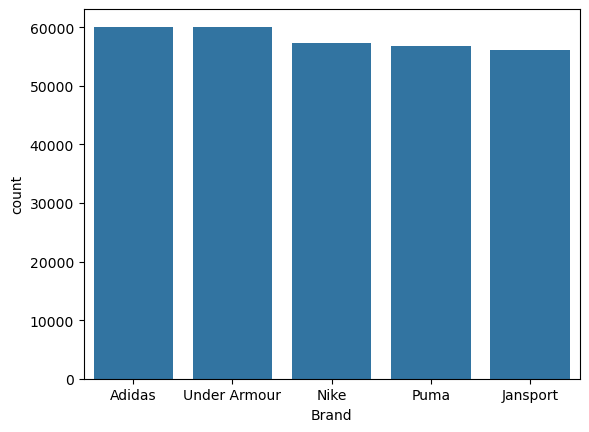

In [8]:
sns.barplot(train['Brand'].value_counts());

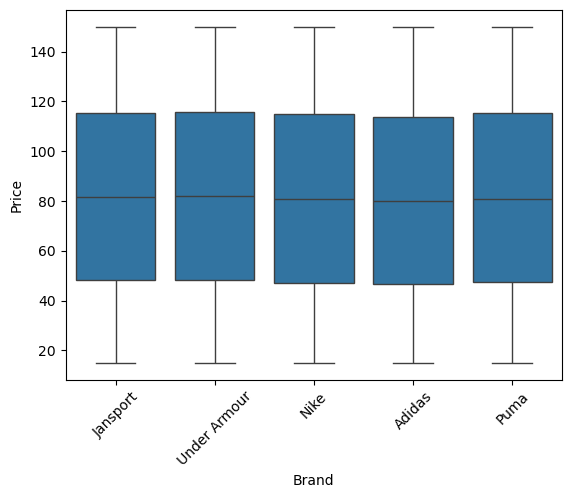

In [9]:
sns.boxplot(data=train, x='Brand', y='Price')
plt.xticks(rotation=45)
plt.show()

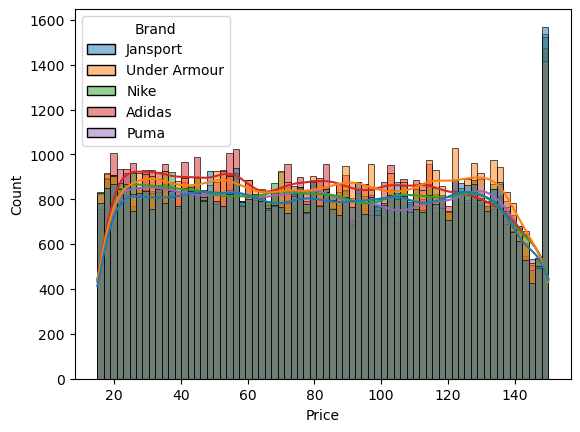

In [10]:
sns.histplot(data=train, x='Price', kde=True, bins=70, hue='Brand');

### Material Column

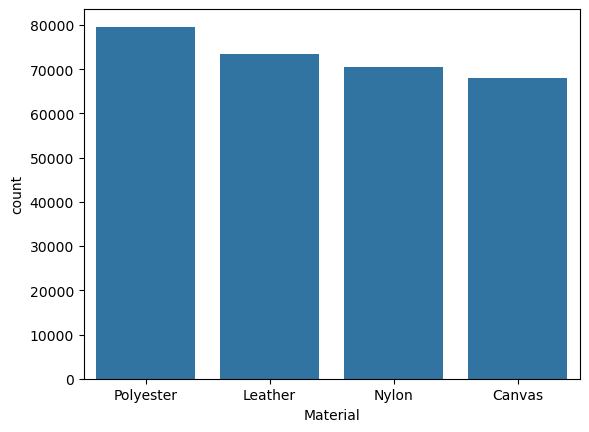

In [11]:
sns.barplot(train['Material'].value_counts());

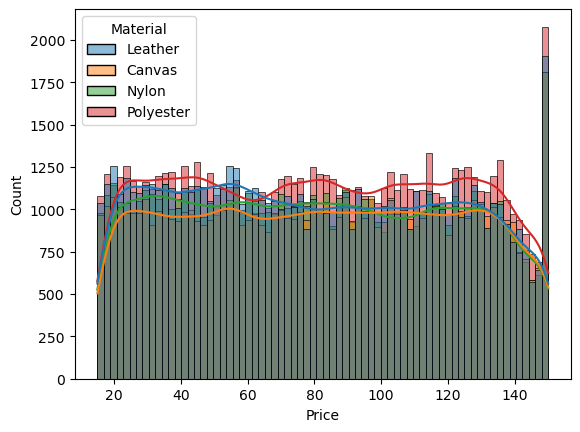

In [12]:
sns.histplot(data=train, x='Price', kde=True, bins=70, hue='Material');

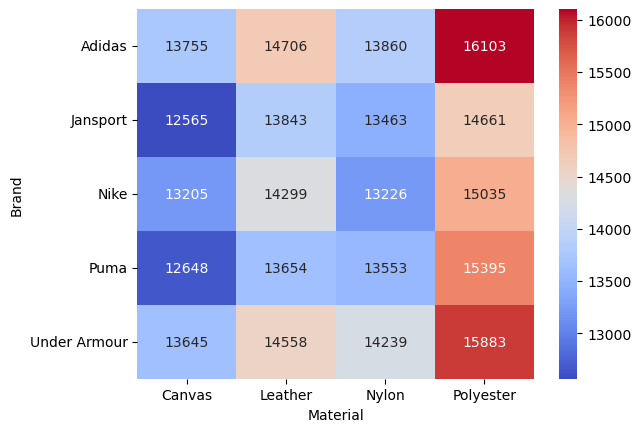

In [13]:
sns.heatmap(pd.crosstab(train['Brand'], train['Material']), annot=True, cmap='coolwarm', fmt='d')
plt.yticks(rotation=0);

### Size Column

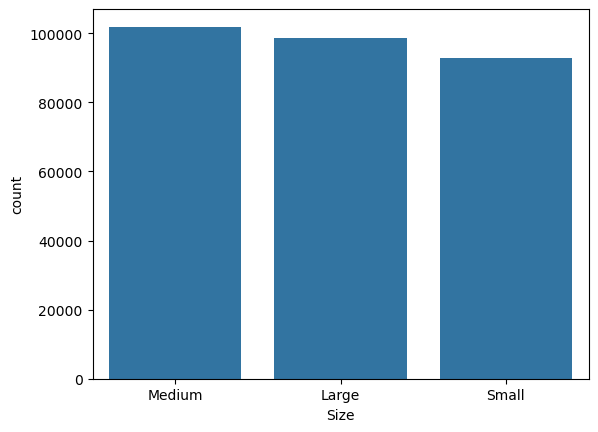

In [14]:
sns.barplot(train['Size'].value_counts());

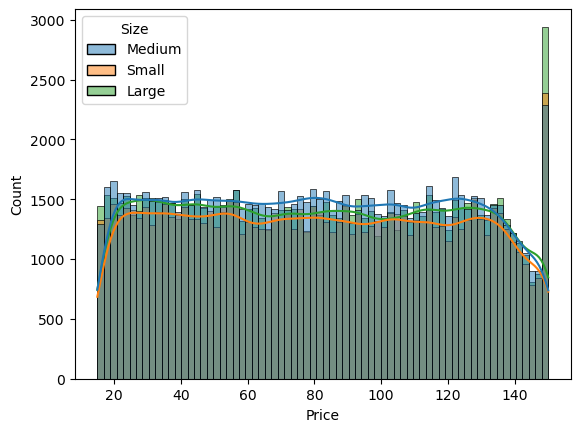

In [15]:
sns.histplot(data=train, x='Price', kde=True, bins=70, hue='Size');

### Compartments Column

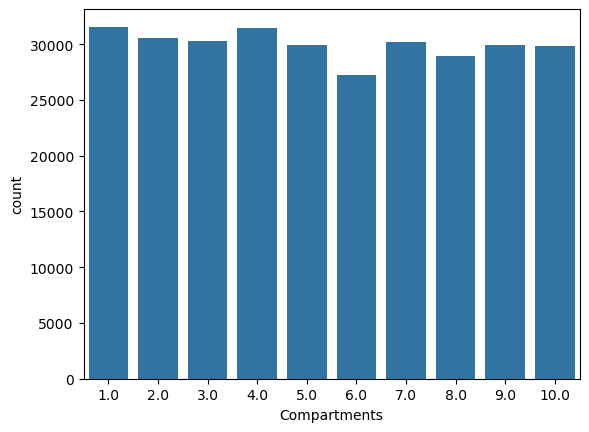

In [16]:
sns.barplot(train['Compartments'].value_counts());

### Laptop Compartment Column

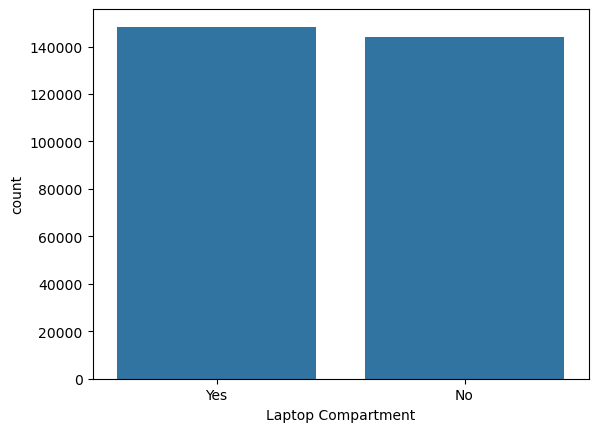

In [17]:
sns.barplot(train['Laptop Compartment'].value_counts());

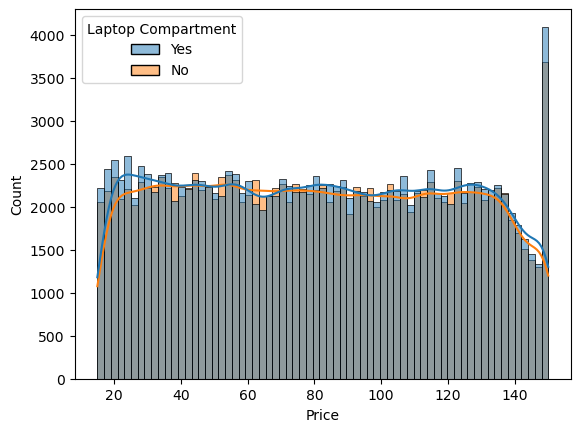

In [18]:
sns.histplot(data=train, hue='Laptop Compartment', x='Price', kde=True);

### Waterproof Column

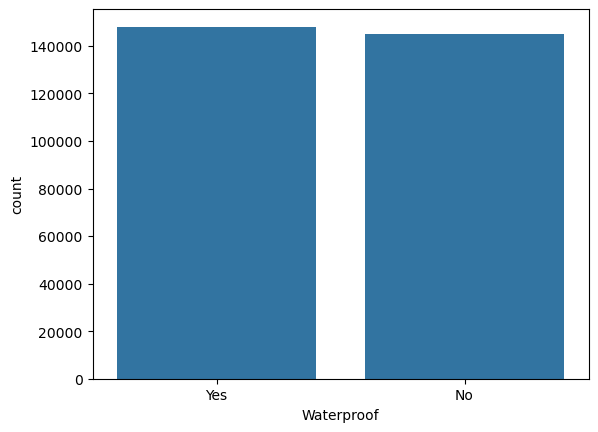

In [19]:
sns.barplot(train['Waterproof'].value_counts());

### Style Column

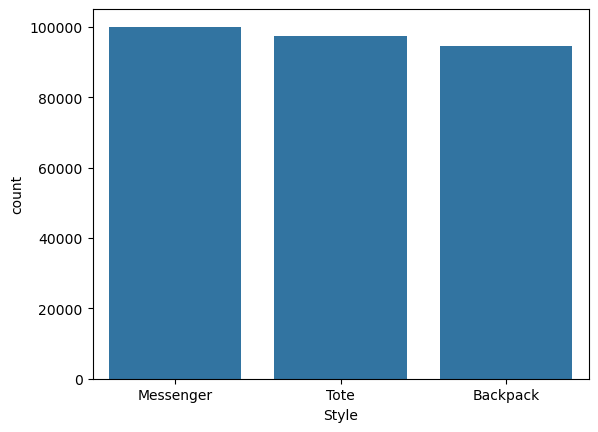

In [20]:
sns.barplot(train['Style'].value_counts());

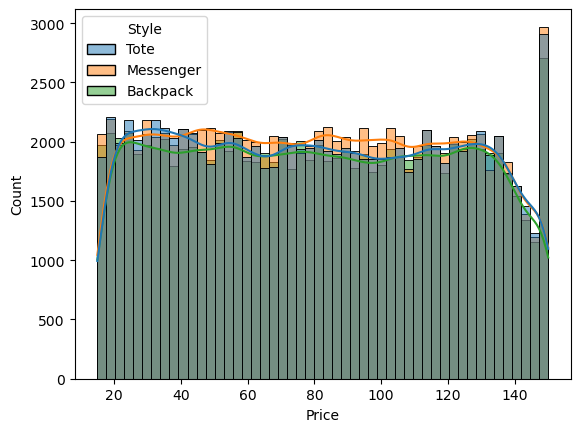

In [21]:
sns.histplot(data=train, x='Price', hue='Style', kde=True, bins=50);

### Color Column

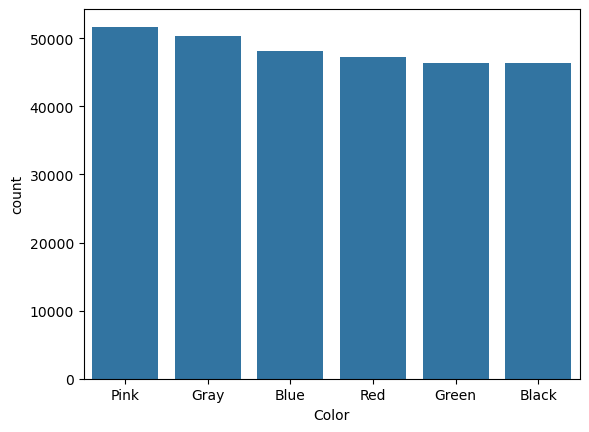

In [22]:
sns.barplot(train['Color'].value_counts());

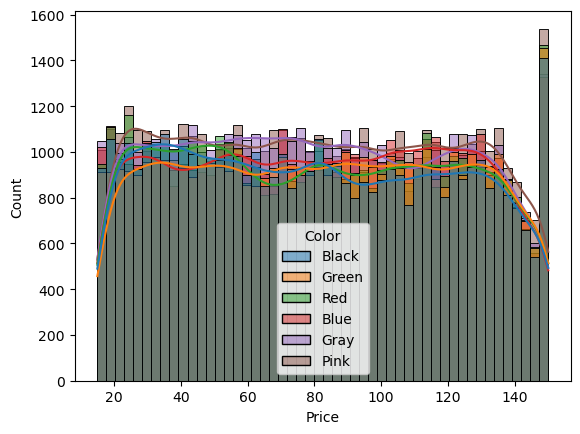

In [23]:
sns.histplot(data=train, x='Price', hue='Color', kde=True, bins=50);

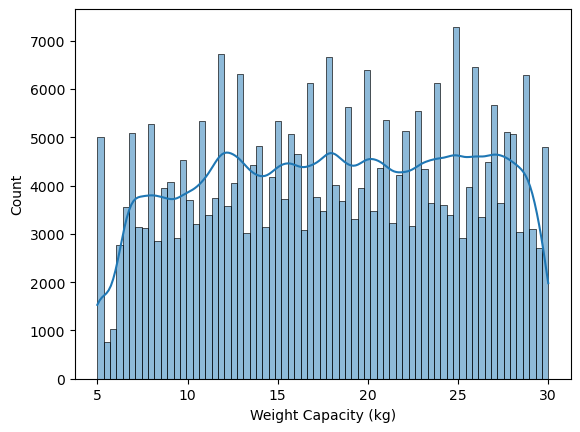

In [24]:
sns.histplot(data=train, x='Weight Capacity (kg)', kde=True);

## Bivariate

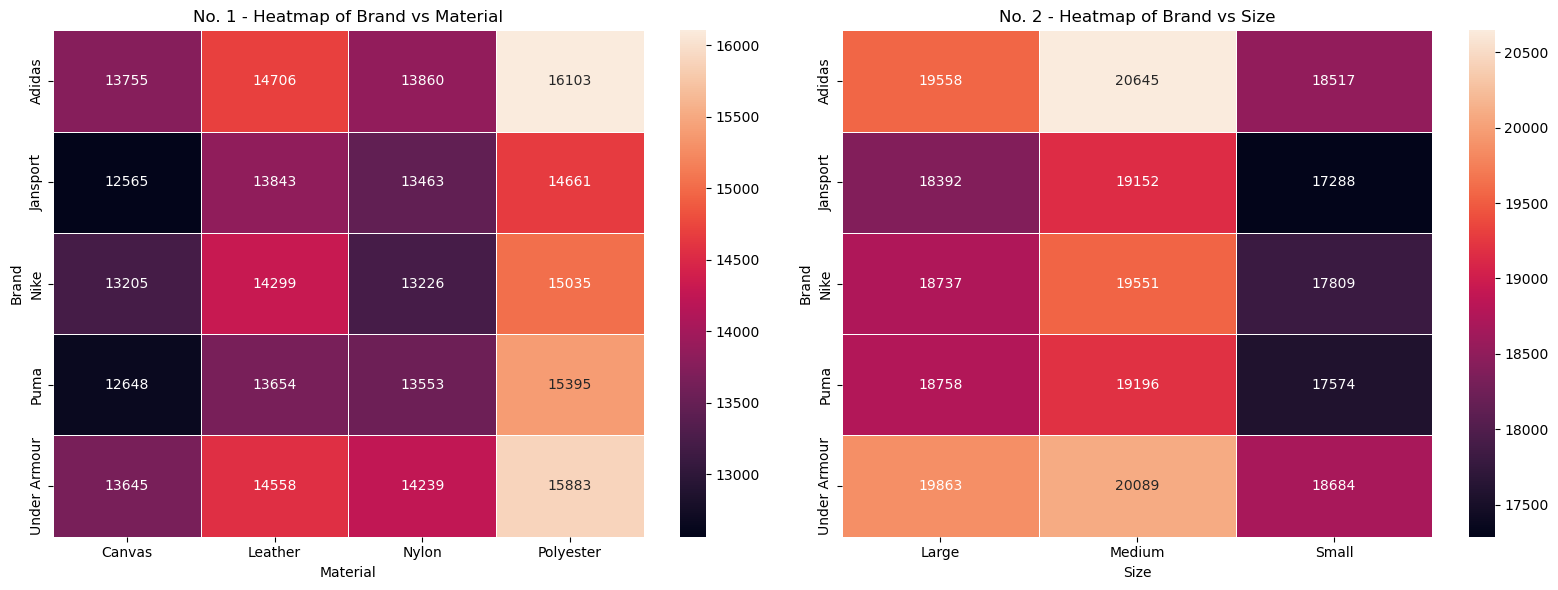

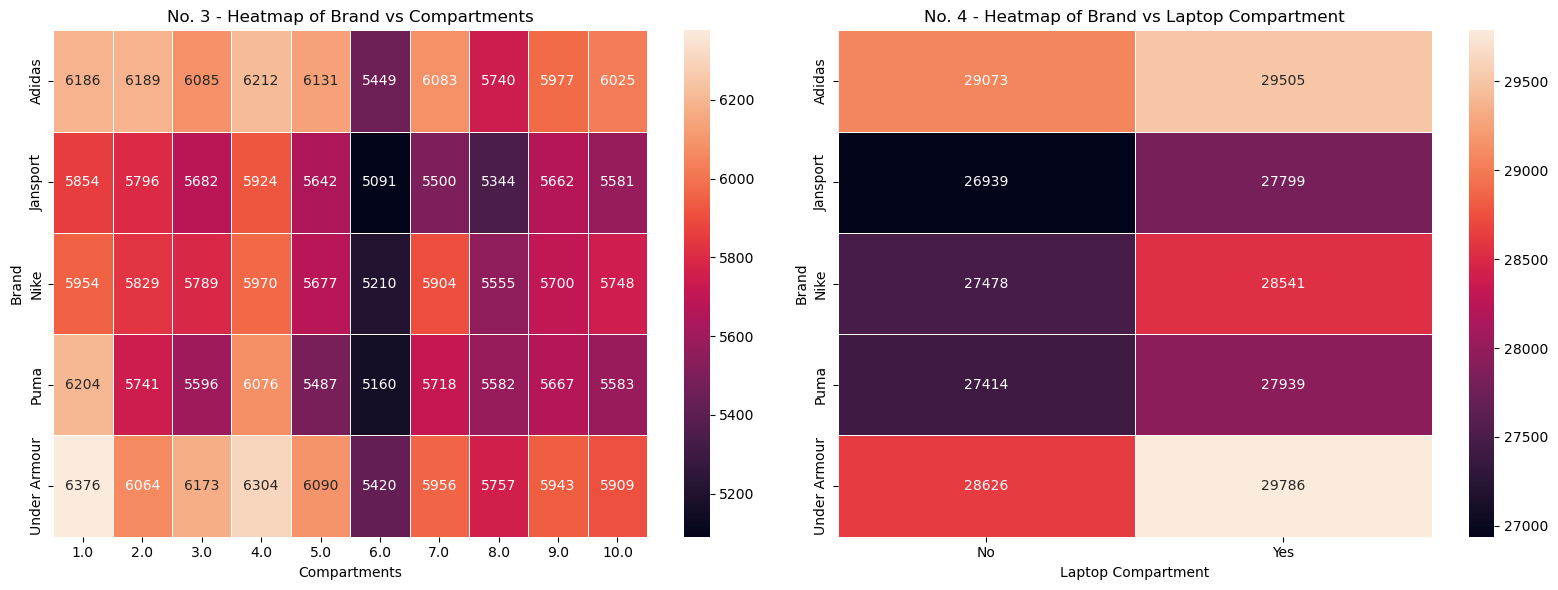

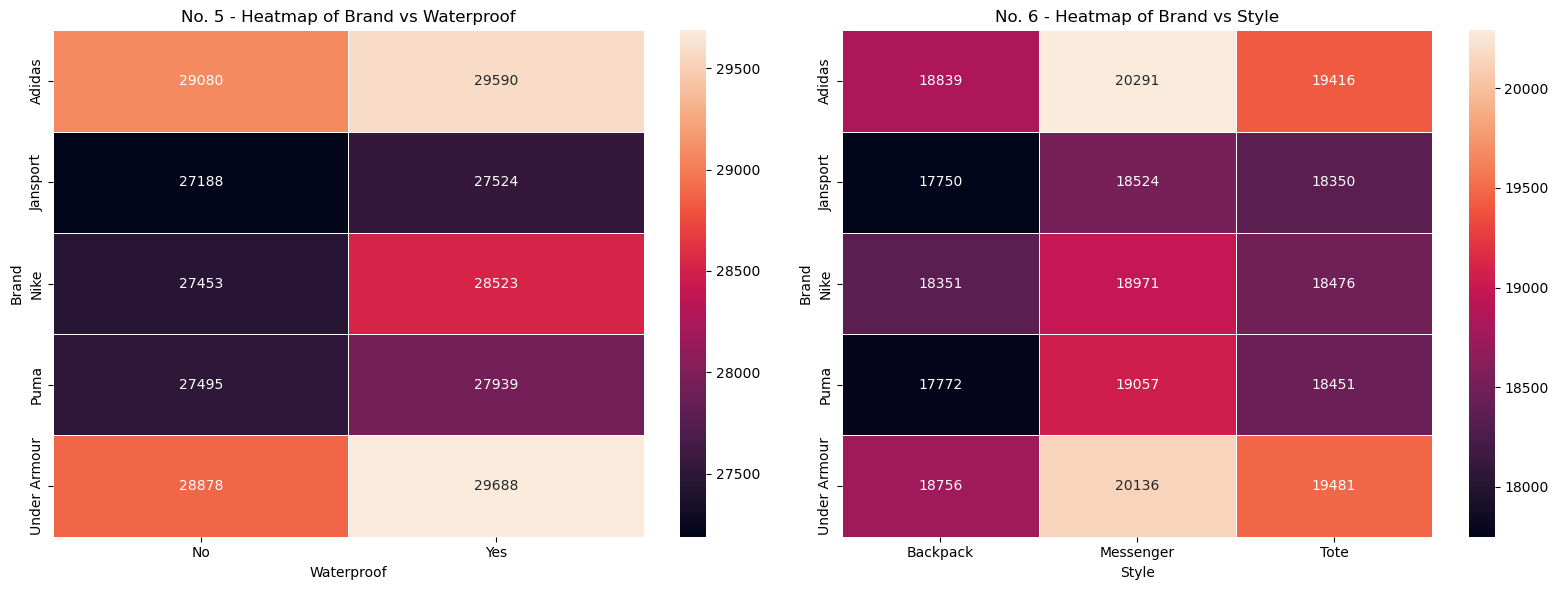

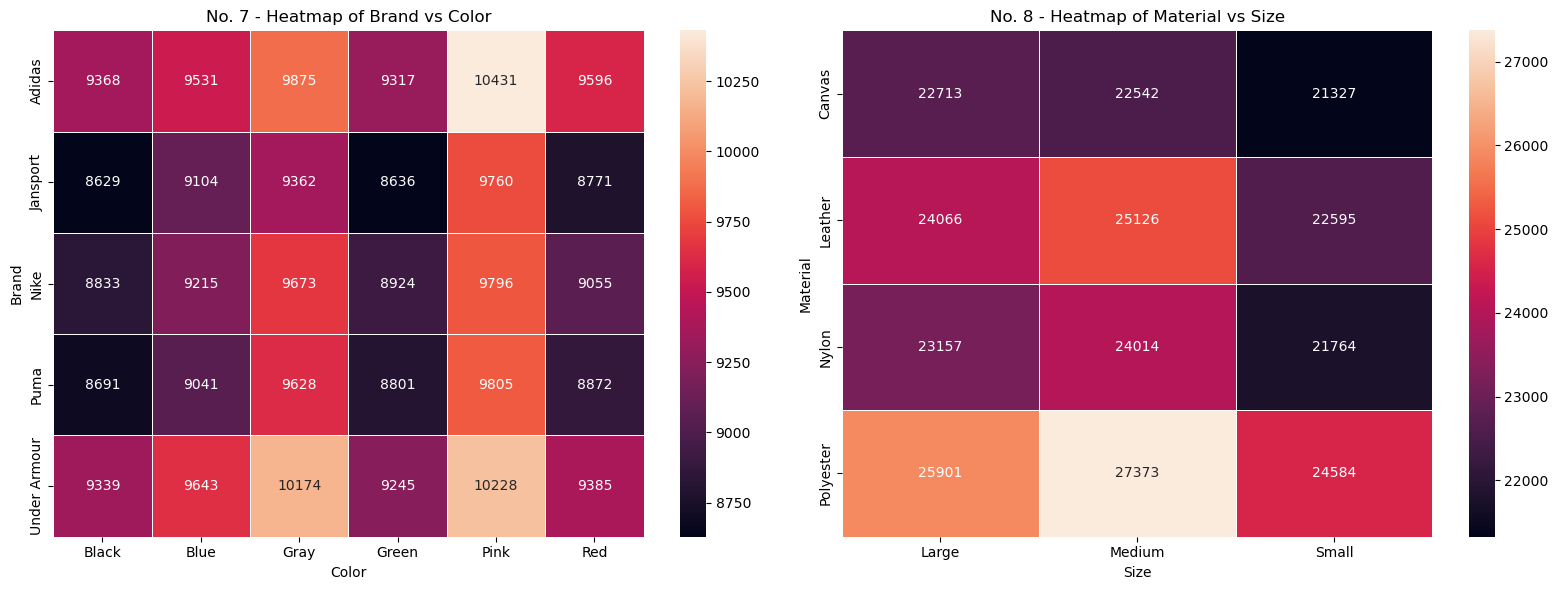

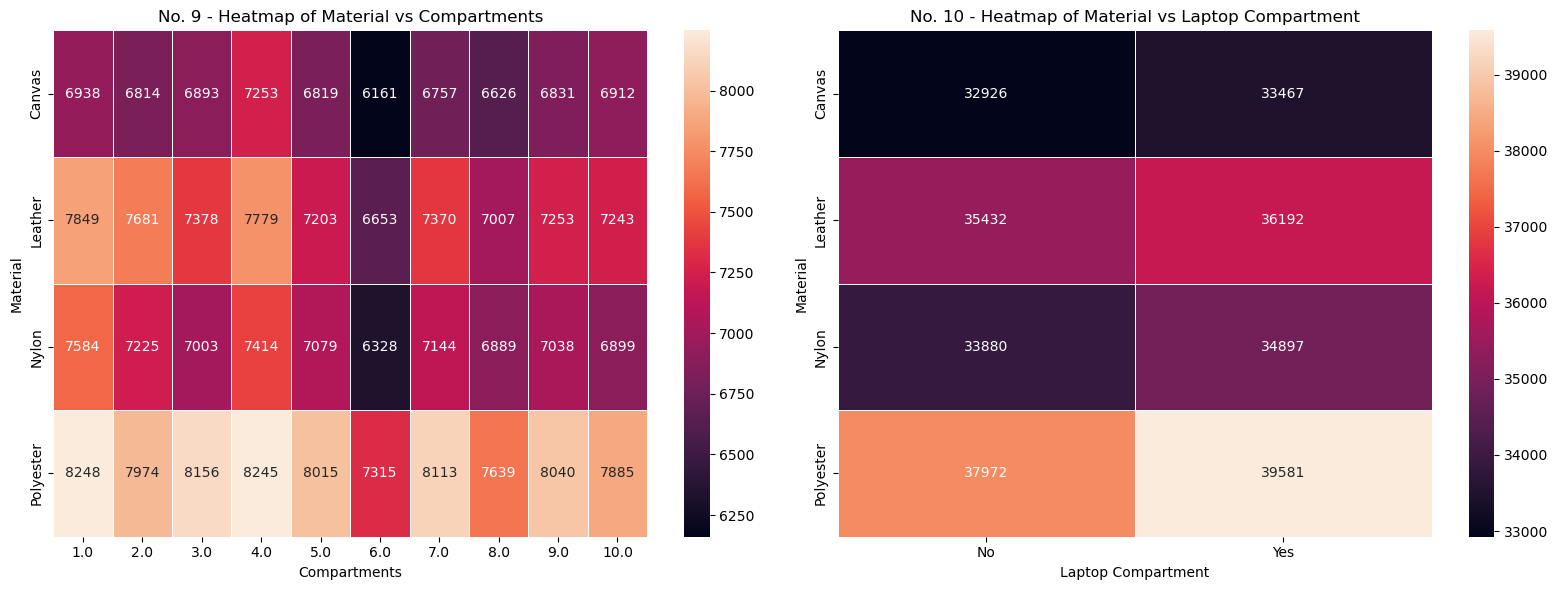

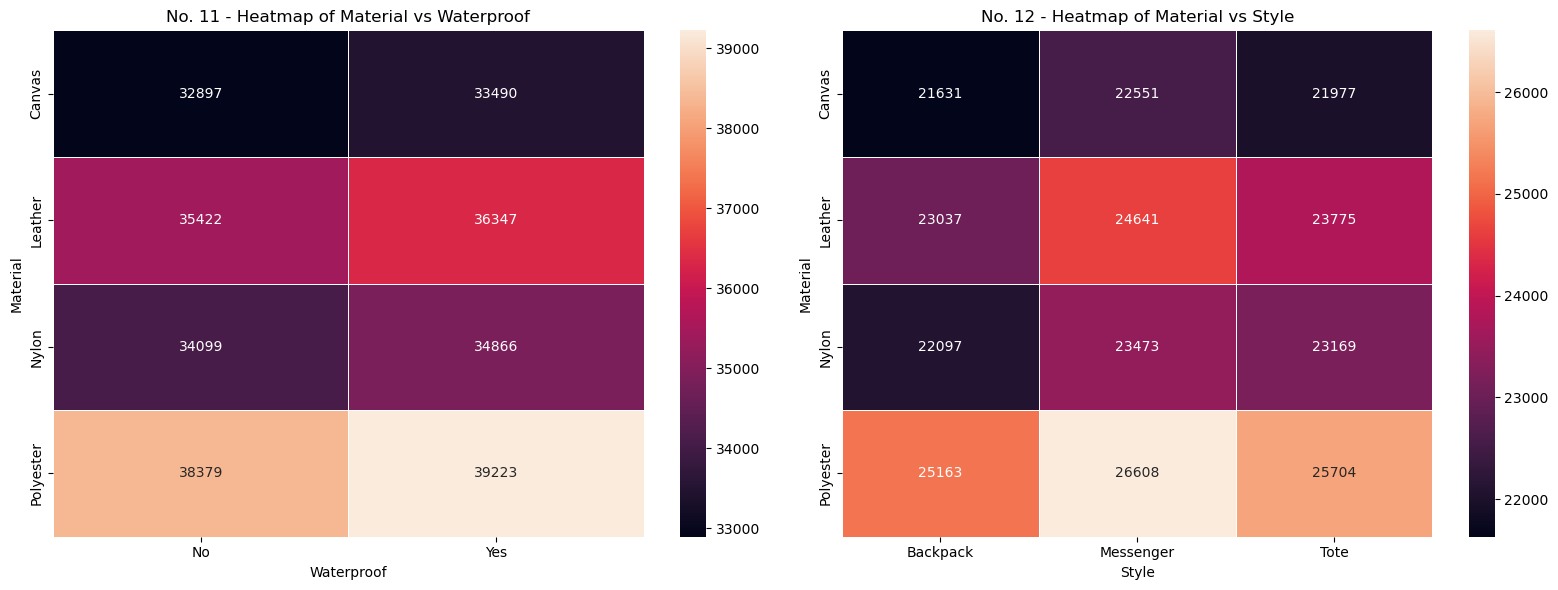

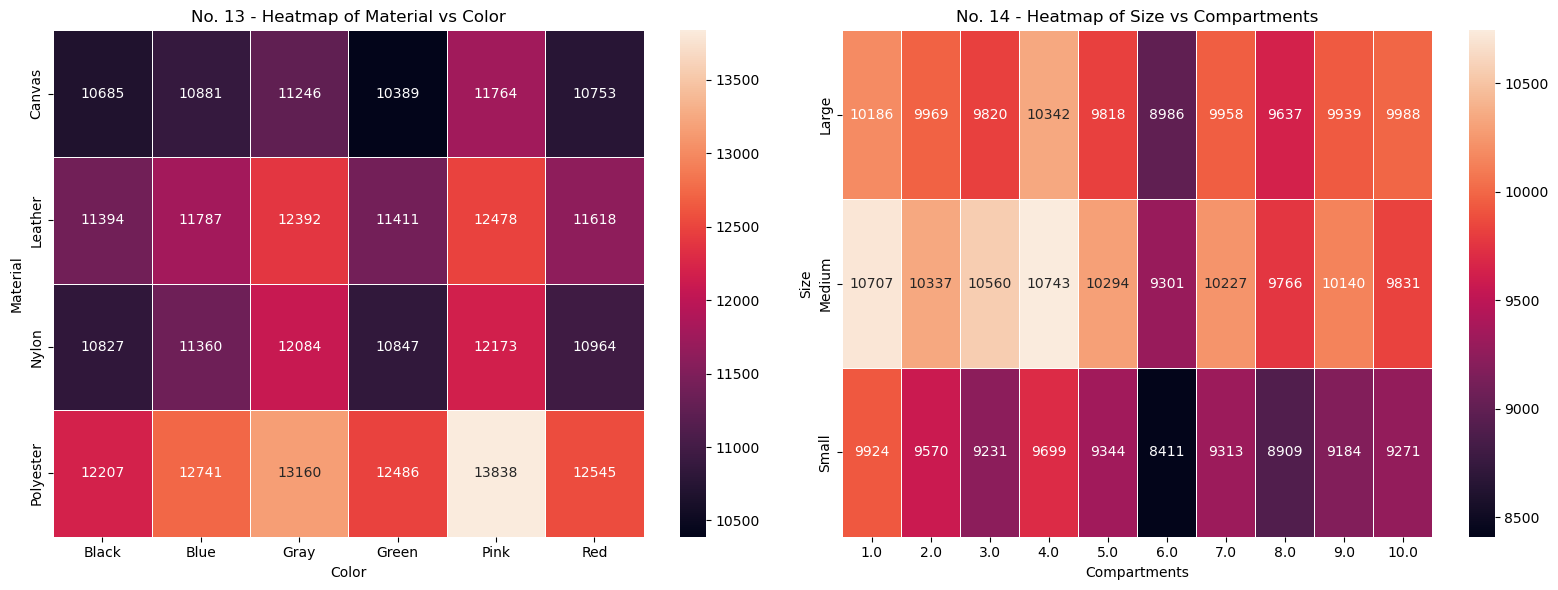

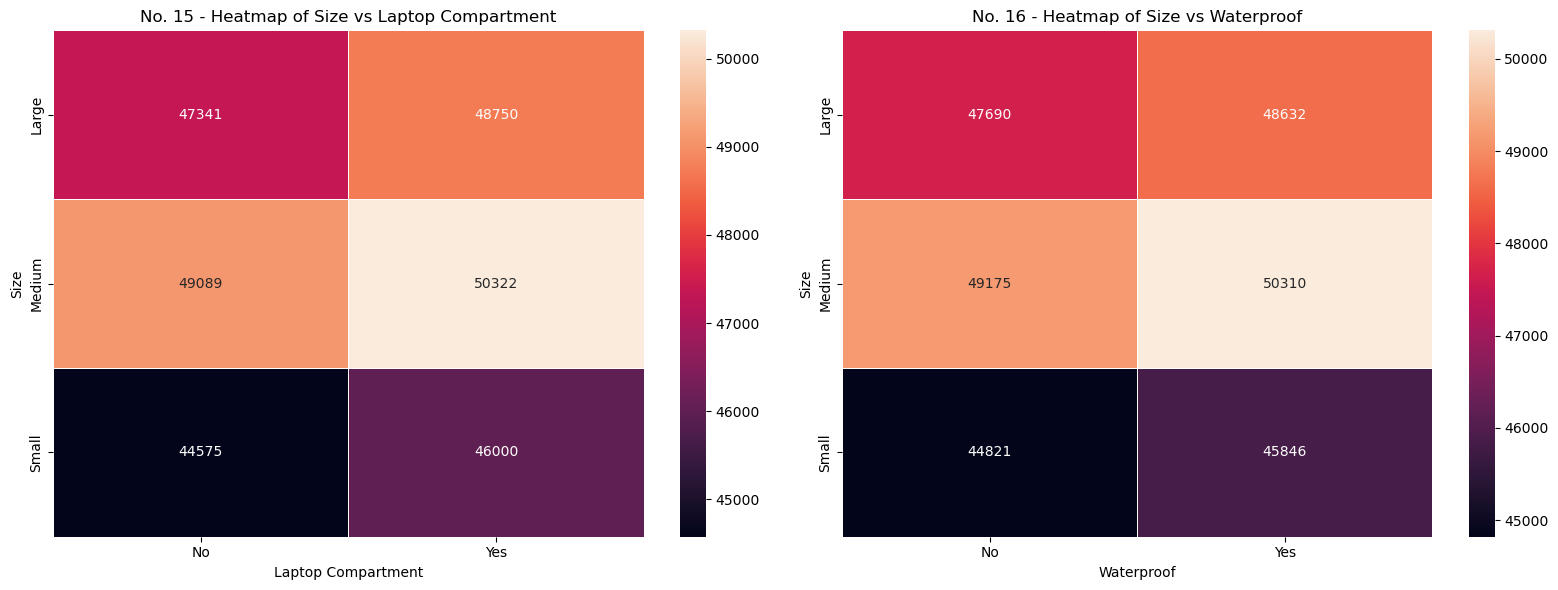

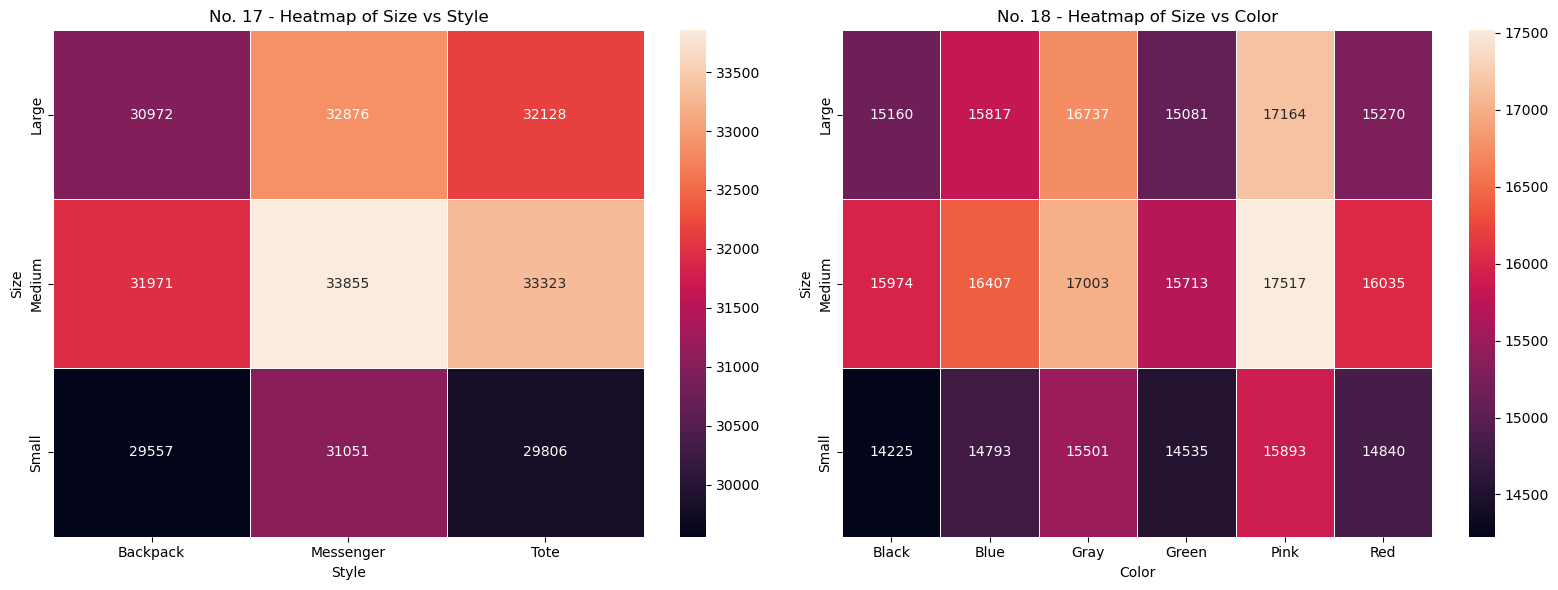

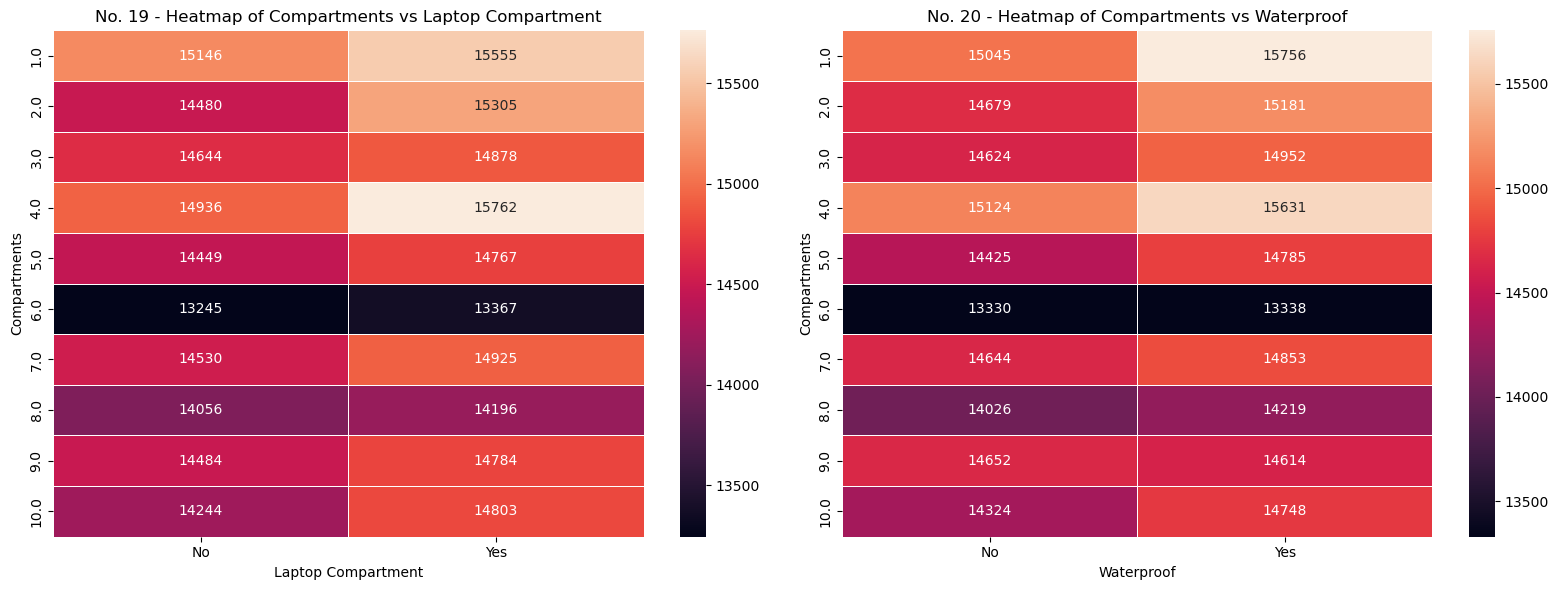

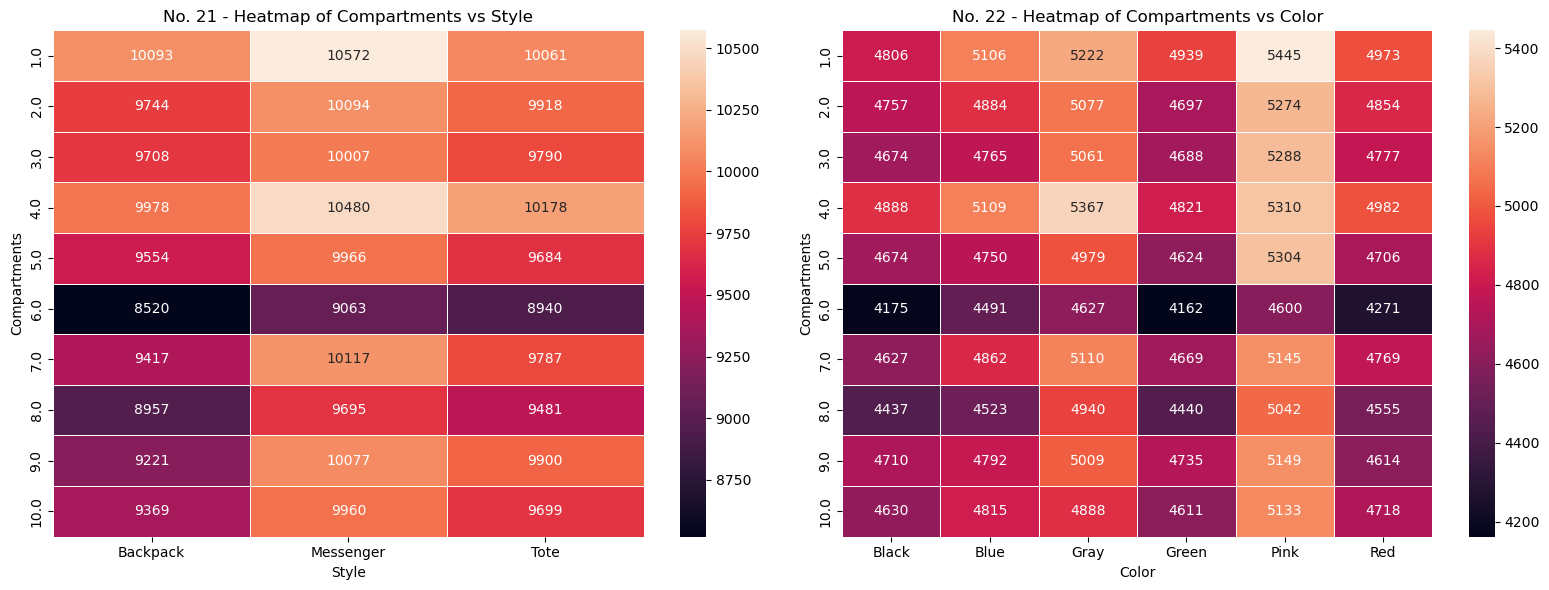

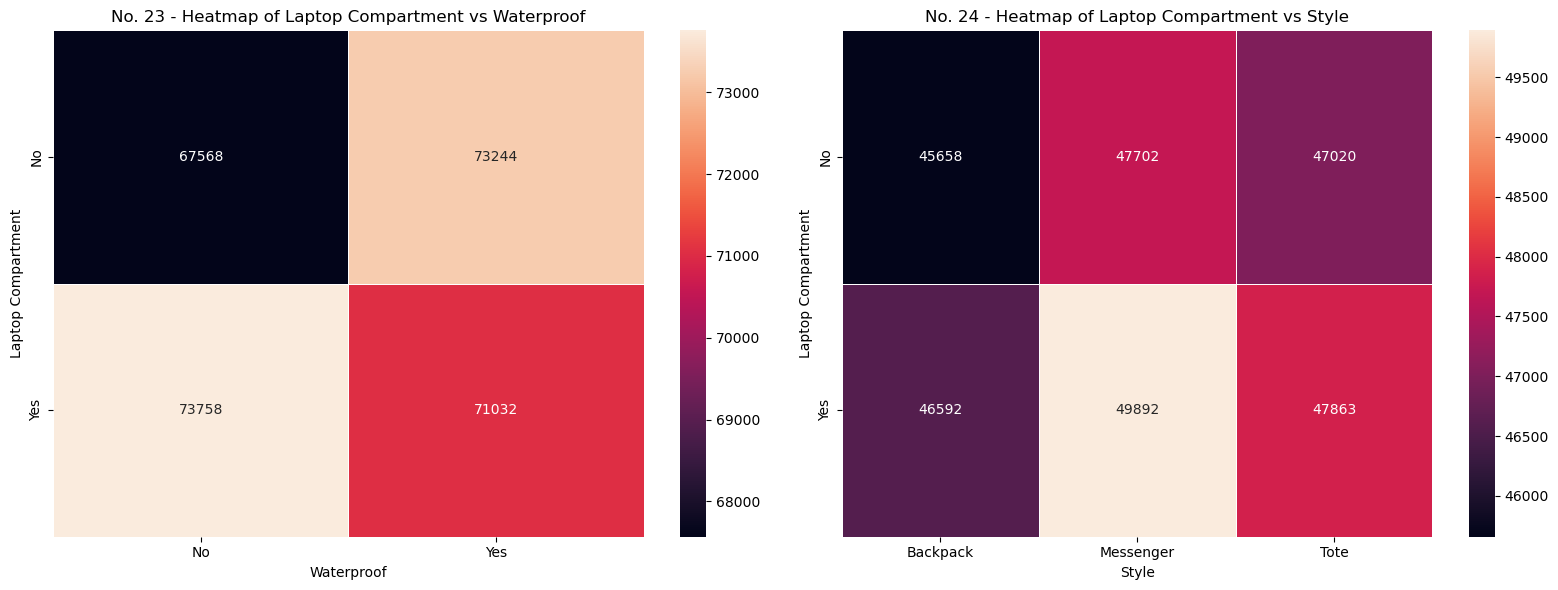

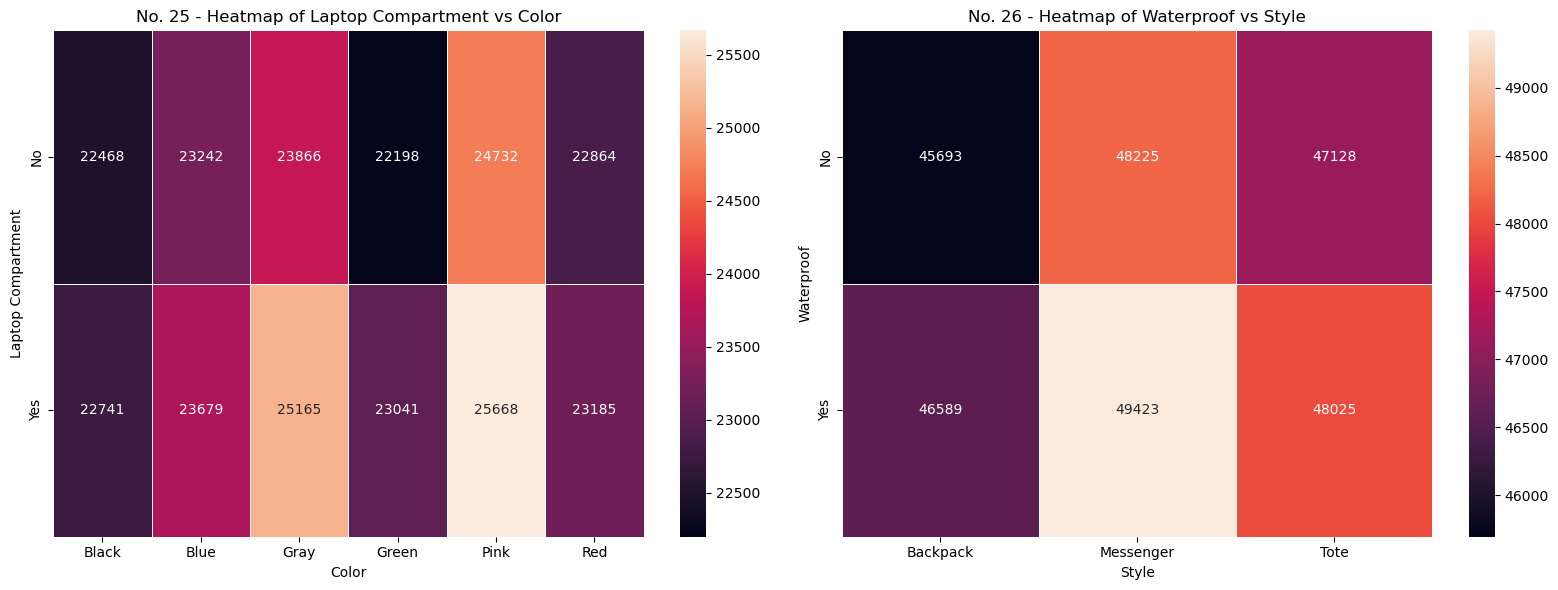

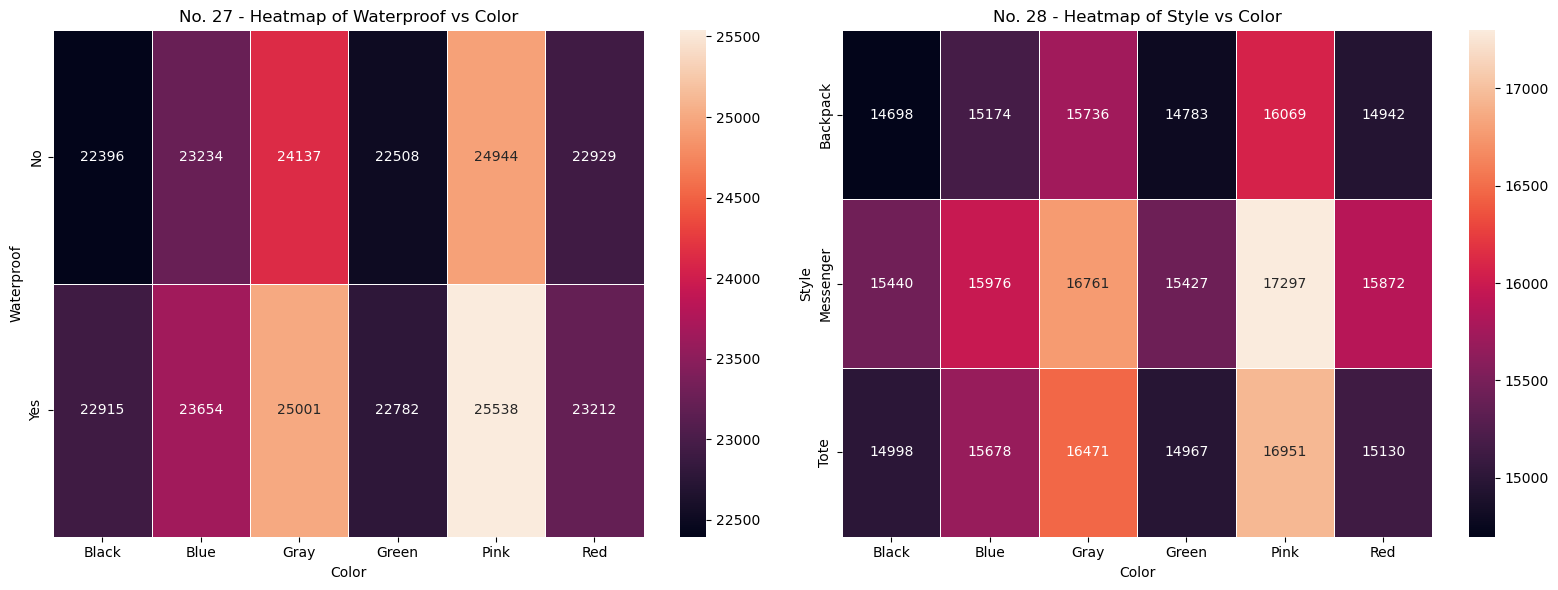

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

# Your categorical columns
biv_cols = ['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
            'Waterproof', 'Style', 'Color']

# Generate all unique pairs of columns
column_pairs = list(itertools.combinations(biv_cols, 2))

# Number of heatmap pairs (even number of pairs to avoid having an odd one out)
n_pairs = len(column_pairs)

# Set up the plot with two subplots side by side
for num in range(0, n_pairs, 2):  # Process two at a time
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns
    

    col1, col2 = column_pairs[num]
    cross_tab1 = pd.crosstab(train[col1], train[col2])
    sns.heatmap(cross_tab1, annot=True, fmt="d", linewidths=0.5, ax=axs[0])
    axs[0].set_title(f'No. {num+1} - Heatmap of {col1} vs {col2}')
    axs[0].set_xlabel(col2)
    axs[0].set_ylabel(col1)


    if num + 1 < n_pairs:  # Check if there’s another pair
        col1, col2 = column_pairs[num + 1]
        cross_tab2 = pd.crosstab(train[col1], train[col2])
        sns.heatmap(cross_tab2, annot=True, fmt="d", linewidths=0.5, ax=axs[1])
        axs[1].set_title(f'No. {num+2} - Heatmap of {col1} vs {col2}')
        axs[1].set_xlabel(col2)
        axs[1].set_ylabel(col1)
    
    plt.tight_layout() 
    plt.show()

In [26]:
# Will start will mode imputation

# Imputation, Encoding and Scaling

In [27]:
obj_cols = ['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
            'Waterproof', 'Style', 'Color']
num_cols = ['Weight Capacity (kg)']
tgt_cols = ['Price']

le_cols = ['Size', 'Laptop Compartment', 'Waterproof', ]
ohe_cols = ['Brand', 'Material', 'Style', 'Color']


In [28]:
def impute_cols(train_data, test_data, obj_cols, num_cols):
    for col in obj_cols:
        fill_value = train_data[col].mode()[0]
        train_data[col] = train_data[col].fillna(fill_value)
        if test_data is not None:
            test_data[col] = test_data[col].fillna(fill_value)

        print(f"{col} imputation successful! - Fill value : {fill_value}")
    for col in num_cols:
        fill_value = train_data[col].mode()[0]
        train_data[col] = train_data[col].fillna(fill_value)
        if test_data is not None:
            test_data[col] = test_data[col].fillna(fill_value)

        print(f"{col} imputation successful! - Fill value : {fill_value}\n")

    print("Done Imputation!!")

    if test_data is None:
        return train_data
    if test_data is not None:
        return train_data, test_data

In [29]:
train_imputed = impute_cols(train_data=train, obj_cols=obj_cols, num_cols=num_cols, test_data=None)
train_imputed.head()

Brand imputation successful! - Fill value : Adidas
Material imputation successful! - Fill value : Polyester
Size imputation successful! - Fill value : Medium
Compartments imputation successful! - Fill value : 1.0
Laptop Compartment imputation successful! - Fill value : Yes
Waterproof imputation successful! - Fill value : Yes
Style imputation successful! - Fill value : Messenger
Color imputation successful! - Fill value : Pink
Weight Capacity (kg) imputation successful! - Fill value : 5.0

Done Imputation!!


,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
id,,,,,,,,,,
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [30]:
train_imputed.isna().sum()

Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64

In [31]:
def encode_and_scale(train_data, test_data, le_cols, ohe_cols, num_cols):
    le = LabelEncoder()
    ohe = OneHotEncoder(drop='first', sparse_output=False)
    scaler = StandardScaler()

    for col in le_cols:
        train_data[col] = le.fit_transform(train_data[col])
        if test_data is not None:
            test_data[col] = test_data[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

    if len(ohe_cols) > 0:
        ohe_train = ohe.fit_transform(train_data[ohe_cols])
        if test_data is not None:
            ohe_test = ohe.transform(test_data[ohe_cols])

        ohe_cols_new = ohe.get_feature_names_out(ohe_cols)
        
        ohe_train_df = pd.DataFrame(ohe_train, columns=ohe_cols_new)
        if test_data is not None:
            ohe_test_df = pd.DataFrame(ohe_test, columns=ohe_cols_new)
        
        train_data = train_data.drop(columns=ohe_cols).reset_index(drop=True)
        if test_data is not None:
            test_data = test_data.drop(columns=ohe_cols).reset_index(drop=True)
        
        train_data = pd.concat([train_data, ohe_train_df], axis=1)
        if test_data is not None:
            test_data = pd.concat([test_data, ohe_test_df], axis=1)

    if len(num_cols) > 0:
        train_data[num_cols] = scaler.fit_transform(train_data[num_cols])
        if test_data is not None:
            test_data[num_cols] = scaler.transform(test_data[num_cols])

    if test_data is not None:
        return train_data, test_data
    if test_data is None:
        return train_data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(train_imputed.drop(tgt_cols, axis=1), train_imputed[tgt_cols],
                                                    test_size=0.2, random_state=42)

In [33]:
X_train_, X_test_ = encode_and_scale(train_data=X_train, test_data=X_test, le_cols=le_cols,
                                     ohe_cols=ohe_cols, num_cols=num_cols)

In [34]:
X_train_.columns = X_train_.columns.str.replace(' ', '_')
X_test_.columns = X_test_.columns.str.replace(' ', '_')

# Training Baselines

In [35]:
def evaluate_models(X_train, X_test, y_train, y_test):
    results = {}

    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'ElasticNet Regression': ElasticNet(),
        'Random Forest': RandomForestRegressor(n_jobs=-1),
        'XGBoost': XGBRegressor(tree_method='hist', device="cuda"),
        'LightGBM': lgb.LGBMRegressor(n_jobs=-1),
        'CatBoost': CatBoostRegressor(task_type='GPU', verbose=100),
        'KNeighbors Regressor': KNeighborsRegressor(n_jobs=-1),
        'Decision Tree': DecisionTreeRegressor(),
        'AdaBoost Regressor': AdaBoostRegressor(),
        'Gradient Boosting': GradientBoostingRegressor(),
        # 'SVR': SVR(),
    }

    for model_name, model in models.items():
        print(f"Training {model_name}...")
        
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
        rmse_cv = -cv_scores.mean()
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        results[model_name] = {'RMSE': rmse, 'CV RMSE': rmse_cv}

        print(f"{model_name} RMSE: {rmse:.4f}, CV RMSE: {rmse_cv:.4f}\n")
    
    results_df = pd.DataFrame(results).T
    return results_df

In [36]:
results = evaluate_models(X_train_, X_test_, y_train, y_test)

Training Linear Regression...
Linear Regression RMSE: 38.9206, CV RMSE: 39.0454

Training Ridge Regression...
Ridge Regression RMSE: 38.9206, CV RMSE: 39.0454

Training Lasso Regression...
Lasso Regression RMSE: 38.9442, CV RMSE: 39.0633

Training ElasticNet Regression...
ElasticNet Regression RMSE: 38.9417, CV RMSE: 39.0613

Training Random Forest...
Random Forest RMSE: 40.1770, CV RMSE: 40.2756

Training XGBoost...
XGBoost RMSE: 39.0824, CV RMSE: 39.2895

Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 301
[LightGBM] [Info] Number of data points in the train set: 192000, number of used features: 19
[LightGBM] [Info] Start training from score 81.459186
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003399 seconds.
You ca

In [37]:
print(results)

                            RMSE    CV RMSE
Linear Regression      38.920648  39.045398
Ridge Regression       38.920647  39.045398
Lasso Regression       38.944202  39.063281
ElasticNet Regression  38.941695  39.061297
Random Forest          40.177020  40.275627
XGBoost                39.082367  39.289468
LightGBM               38.931290  39.062305
CatBoost               38.996909  39.147219
KNeighbors Regressor   42.637143  42.778188
Decision Tree          55.928714  55.972108
AdaBoost Regressor     38.923094  39.056535
Gradient Boosting      38.914633  39.040720


# HYPERPARAMETER TUNING

## GridSearchCV - Linear regression

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

def tune_linear_regression(X_train, y_train):
    linear_reg = LinearRegression()

    param_grid = {
        'fit_intercept': [True, False],
        'copy_X': [True, False],
        'n_jobs': [-1], 
        'positive': [True, False] 
    }

    grid_search = GridSearchCV(estimator=linear_reg, param_grid=param_grid,
                               scoring='neg_root_mean_squared_error', cv=5, verbose=1, 
                               n_jobs=-1)

    total_iter = len(param_grid['fit_intercept']) * len(param_grid['copy_X']) * len(param_grid['positive'])
    
    with tqdm(total=total_iter, dynamic_ncols=True) as pbar:
        grid_search.fit(X_train, y_train)
        pbar.update(total_iter) 

    print(f"Best parameters for Linear Regression: {grid_search.best_params_}")
    print(f"Best RMSE for Linear Regression: {-grid_search.best_score_}")

    return grid_search.best_params_

In [39]:
best_params = tune_linear_regression(X_train_, y_train)

  0%|          | 0/8 [00:00<?, ?it/s]

Fitting 5 folds for each of 8 candidates, totalling 40 fits


100%|██████████| 8/8 [00:05<00:00,  1.52it/s]

Best parameters for Linear Regression: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}
Best RMSE for Linear Regression: 39.045398178537084


## Elastic Net - GridSearchCV

In [40]:
def tune_elastic_net(X_train, y_train):
    elastic_net = ElasticNet()

    param_grid = {
        'alpha': np.logspace(-4, 4, 9),  # Regularization parameter
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1],  # ElasticNet mixing parameter
        'fit_intercept': [True, False],
        'selection': ['cyclic', 'random']
    }

    grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid,
                               scoring='neg_root_mean_squared_error', cv=5, verbose=1, 
                               n_jobs=-1)

    total_iter = len(param_grid['alpha']) * len(param_grid['l1_ratio']) * len(param_grid['fit_intercept']) * len(param_grid['selection'])
    
    with tqdm(total=total_iter, dynamic_ncols=True) as pbar:
        grid_search.fit(X_train, y_train)
        pbar.update(total_iter)

    print(f"Best parameters for ElasticNet: {grid_search.best_params_}")
    print(f"Best RMSE for ElasticNet: {-grid_search.best_score_}")

    return grid_search.best_params_

In [41]:
best_params = tune_elastic_net(X_train_, y_train)

  0%|          | 0/216 [00:00<?, ?it/s]

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


100%|██████████| 216/216 [02:06<00:00,  1.70it/s]

Best parameters for ElasticNet: {'alpha': 0.001, 'fit_intercept': True, 'l1_ratio': 1, 'selection': 'cyclic'}
Best RMSE for ElasticNet: 39.045365098937275


## Optuna for XGBoost

In [43]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

best_rmse = float('inf')

def objective(trial):
    global best_rmse

    # param = {
    #     'objective': 'reg:squarederror',
    #     'eval_metric': 'rmse',
    #     'tree_method': 'gpu_hist',
    #     'device': 'cuda',
    #     'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
    #     'max_depth': trial.suggest_int('max_depth', 3, 10),
    #     'n_estimators': 200,
    #     'subsample': trial.suggest_float('subsample', 0.5, 1.0),
    #     'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    #     'gamma': trial.suggest_float('gamma', 0, 1),
    #     'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
    # }
    param = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'tree_method': 'gpu_hist',
        'device': 'cuda',
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.5),
        'max_depth': trial.suggest_int('max_depth', 2, 15),
        'n_estimators': trial.suggest_int('n_estimators', 100, 800),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0), 
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5), 
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
    }

    model = XGBRegressor(**param)
    model.fit(X_train_, y_train)
    y_pred = model.predict(X_test_)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    if rmse < best_rmse:
        best_rmse = rmse
        print(f"New Best RMSE: {rmse:.5f} | Params: {param}")

    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=500, n_jobs=-1, show_progress_bar=True)

  0%|          | 0/500 [00:00<?, ?it/s]

New Best RMSE: 39.06016 | Params: {'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'tree_method': 'gpu_hist', 'device': 'cuda', 'learning_rate': 0.23968009093319131, 'max_depth': 5, 'n_estimators': 145, 'subsample': 0.43585223115826255, 'colsample_bytree': 0.7497616733453112, 'gamma': 3.134955491216678, 'min_child_weight': 17}
New Best RMSE: 39.01300 | Params: {'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'tree_method': 'gpu_hist', 'device': 'cuda', 'learning_rate': 0.20019752979929567, 'max_depth': 4, 'n_estimators': 333, 'subsample': 0.42288902701290576, 'colsample_bytree': 0.7749995324536021, 'gamma': 1.4265104816746015, 'min_child_weight': 12}
New Best RMSE: 38.91797 | Params: {'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'tree_method': 'gpu_hist', 'device': 'cuda', 'learning_rate': 0.007622218639867162, 'max_depth': 3, 'n_estimators': 467, 'subsample': 0.8830677605388084, 'colsample_bytree': 0.9053037238175267, 'gamma': 4.422334593457304, 'min_child_w

In [74]:
import optuna
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# Set Optuna logging verbosity
optuna.logging.set_verbosity(optuna.logging.WARNING)

best_rmse = float('inf')

def objective(trial):
    global best_rmse

    param = {
        'objective': 'RMSE',
        'eval_metric': 'RMSE',
        'iterations': trial.suggest_int('iterations', 100, 800),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.5),
        'depth': trial.suggest_int('depth', 2, 15),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        # 'bagging_temperature': trial.suggest_float('bagging_temperature', 0.1, 1.0),
        'random_seed': 42,
        'verbose': 0,  # No verbose output from CatBoost
        'task_type': 'GPU',  # Specify GPU usage
        'devices': '0',  # Specify GPU device, '0' is typically the first GPU
        'bootstrap_type': 'Bernoulli',  # Correct bootstrap type for subsample
    }

    model = CatBoostRegressor(**param)
    model.fit(X_train_, y_train)
    y_pred = model.predict(X_test_)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    if rmse < best_rmse:
        best_rmse = rmse
        print(f"New Best RMSE: {rmse:.5f} | Params: {param}")

    return rmse

# Create and optimize the study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=2000, n_jobs=1, show_progress_bar=True)

  0%|          | 0/2000 [00:00<?, ?it/s]

New Best RMSE: 39.22104 | Params: {'objective': 'RMSE', 'eval_metric': 'RMSE', 'iterations': 247, 'learning_rate': 0.2867695512871243, 'depth': 8, 'l2_leaf_reg': 7.669905253820278, 'subsample': 0.8764198725246991, 'random_seed': 42, 'verbose': 0, 'task_type': 'GPU', 'devices': '0', 'bootstrap_type': 'Bernoulli'}
New Best RMSE: 39.00031 | Params: {'objective': 'RMSE', 'eval_metric': 'RMSE', 'iterations': 410, 'learning_rate': 0.3887867142154212, 'depth': 4, 'l2_leaf_reg': 8.054623600585506, 'subsample': 0.6421384041915154, 'random_seed': 42, 'verbose': 0, 'task_type': 'GPU', 'devices': '0', 'bootstrap_type': 'Bernoulli'}
New Best RMSE: 38.91759 | Params: {'objective': 'RMSE', 'eval_metric': 'RMSE', 'iterations': 251, 'learning_rate': 0.01592480343912391, 'depth': 3, 'l2_leaf_reg': 9.140875691494006, 'subsample': 0.9054418761029047, 'random_seed': 42, 'verbose': 0, 'task_type': 'GPU', 'devices': '0', 'bootstrap_type': 'Bernoulli'}
New Best RMSE: 38.91630 | Params: {'objective': 'RMSE', '

In [75]:
study.best_params

{'iterations': 237,
 'learning_rate': 0.1490862870726785,
 'depth': 2,
 'l2_leaf_reg': 5.259516388580975,
 'subsample': 0.43573983606694344}

# Test data Processing and stuff

In [90]:
test = pd.read_csv('./data/playground-series-s5e2/test.csv').set_index('id')
test.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
id,,,,,,,,,
300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


In [91]:
train = pd.read_csv('./data/playground-series-s5e2/train.csv').set_index('id')
train.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
id,,,,,,,,,,
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [92]:
train_imputed, test_imputed = impute_cols(train_data=train, obj_cols=obj_cols, num_cols=num_cols, test_data=test)
test_imputed.head()

Brand imputation successful! - Fill value : Adidas
Material imputation successful! - Fill value : Polyester
Size imputation successful! - Fill value : Medium
Compartments imputation successful! - Fill value : 1.0
Laptop Compartment imputation successful! - Fill value : Yes
Waterproof imputation successful! - Fill value : Yes
Style imputation successful! - Fill value : Messenger
Color imputation successful! - Fill value : Pink
Weight Capacity (kg) imputation successful! - Fill value : 5.0

Done Imputation!!


,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
id,,,,,,,,,
300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
300004,Adidas,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953


In [93]:
train_imputed.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
id,,,,,,,,,,
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [94]:
test_imputed['Size'].value_counts()

Size
Medium    72156
Large     65684
Small     62160
Name: count, dtype: int64

In [95]:
train_copy_enc, test_enc = encode_and_scale(train_data=train_imputed, test_data=test_imputed, le_cols=le_cols,
                                     ohe_cols=ohe_cols, num_cols=num_cols)

test_enc.head()

,Size,Compartments,Laptop Compartment,Waterproof,Weight Capacity (kg),Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Material_Leather,Material_Nylon,Material_Polyester,Style_Messenger,Style_Tote,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red
0,2,2.0,0,0,0.379742,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,7.0,0,1,-0.639788,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,9.0,0,1,-0.891449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,1.0,1,0,0.064990,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,2.0,1,1,-1.164275,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [98]:
train_copy_enc.columns = train_copy_enc.columns.str.replace(' ', '_')
test_enc.columns = test_enc.columns.str.replace(' ', '_')

In [99]:
sample_sub = pd.read_csv('./data/playground-series-s5e2/sample_submission.csv')
sample_sub.head()

,id,Price
0,300000,81.411
1,300001,81.411
2,300002,81.411
3,300003,81.411
4,300004,81.411


# Training on whole data with new params everytime

In [52]:
def make_preds(models, params, train_data, test_data, sample_sub, name, **kwargs):
    model = models(**params, **kwargs)
    print("Fitting....")
    model.fit(train_data.drop(['Price'], axis=1), train_data['Price'])
    print("Predicting....")
    preds = model.predict(test_data)
    print("Saving....")
    sample_sub['Price'] = preds
    sample_sub.to_csv(f'./submissions/{str(name)}', index=False)
    print("Done!")

In [55]:
# 1. Linear Regression
params = {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}
model = LinearRegression

make_preds(models=model, params=params, train_data=train_copy_enc, test_data=test_enc, 
           sample_sub=sample_sub, name='GridSearch_LinearRegression.csv')

# Score - 39.14773

Fitting....
Predicting....
Saving....
Done!


In [ ]:
# 2. XGBoost Optuna
params = {'learning_rate': 0.03440598938090024,
          'max_depth': 2,
          'n_estimators': 597,
          'subsample': 0.49942492435199753,
          'colsample_bytree': 0.7094069370929462,
          'gamma': 4.4792903658045065,
          'min_child_weight': 11}

model = XGBRegressor
make_preds(models=model, params=params, train_data=train_copy_enc, test_data=test_enc, 
           sample_sub=sample_sub, name='XGB_Optuna_1.csv')

#  Score - 39.13840

Fitting....
Predicting....
Saving....
Done!


In [ ]:
# 3. CatBoost Optuna
params = {'objective': 'RMSE', 'eval_metric': 'RMSE', 'iterations': 101, 
          'learning_rate': 0.19437423506677795, 'depth': 3, 
          'l2_leaf_reg': 7.035083804063252, 'subsample': 0.7052725830955228, 
          'random_seed': 42, 'verbose': 0, 
          'task_type': 'GPU', 'devices': '0', 
          'bootstrap_type': 'Bernoulli'}
model = CatBoostRegressor
make_preds(models=model, params=params, train_data=train_copy_enc, test_data=test_enc, 
           sample_sub=sample_sub, name='Cat_Optuna_1.csv')

# Score: 39.14265

Fitting....
Predicting....
Saving....
Done!


In [76]:
# 4. CatBoost Optuna 
params = {'objective': 'RMSE', 'eval_metric': 'RMSE', 'iterations': 237, 
          'learning_rate': 0.1490862870726785, 'depth': 2, 
          'l2_leaf_reg': 5.259516388580975, 'subsample': 0.43573983606694344, 
          'random_seed': 42, 'verbose': 0, 
          'task_type': 'GPU', 'devices': '0', 
          'bootstrap_type': 'Bernoulli'}
model = CatBoostRegressor
make_preds(models=model, params=params, train_data=train_copy_enc, test_data=test_enc, 
           sample_sub=sample_sub, name='Cat_Optuna_2.csv')

Fitting....
Predicting....
Saving....
Done!


## Stacking Regressors

In [101]:
# Stacking regressor - 1
xgb_1 = {'objective': 'reg:squarederror', 'eval_metric': 'rmse', 
         'tree_method': 'gpu_hist', 'device': 'cuda', 'learning_rate': 0.03843586377106862, 
         'max_depth': 2, 'n_estimators': 587, 'subsample': 0.48953769882659876, 
         'colsample_bytree': 0.7018454672720531, 'gamma': 3.593736567606315, 
         'min_child_weight': 10}

xgb_2 = {'objective': 'reg:squarederror', 'eval_metric': 'rmse', 
         'tree_method': 'gpu_hist', 'device': 'cuda', 'learning_rate': 0.03440598938090024, 
         'max_depth': 2, 'n_estimators': 597, 'subsample': 0.49942492435199753, 
         'colsample_bytree': 0.7094069370929462, 'gamma': 4.4792903658045065,
         'min_child_weight': 11}

cat_1 = {'objective': 'RMSE', 'eval_metric': 'RMSE', 
         'iterations': 237, 'learning_rate': 0.1490862870726785, 
         'depth': 2, 'l2_leaf_reg': 5.259516388580975, 'subsample': 0.43573983606694344, 
         'random_seed': 42, 'verbose': 0, 'task_type': 'GPU', 'devices': '0', 
         'bootstrap_type': 'Bernoulli'}

cat_2 =  {'objective': 'RMSE', 'eval_metric': 'RMSE', 
          'iterations': 101, 'learning_rate': 0.19437423506677795, 
          'depth': 3, 'l2_leaf_reg': 7.035083804063252, 
          'subsample': 0.7052725830955228, 'random_seed': 42,
          'verbose': 0, 'task_type': 'GPU', 'devices': '0', 
          'bootstrap_type': 'Bernoulli'}

catboost_model1 = CatBoostRegressor(**cat_1)
catboost_model2 = CatBoostRegressor(**cat_2)  
xgb_model1 = XGBRegressor(**xgb_1)  
xgb_model2 = XGBRegressor(**xgb_2)  

final_model = LinearRegression()

base_learners = [
    ('catboost1', catboost_model1),
    ('catboost2', catboost_model2),
    ('xgb1', xgb_model1),
    ('xgb2', xgb_model2)
]

stacking_model = StackingRegressor(
    estimators=base_learners,
    final_estimator=final_model,
    cv=5,  
    verbose=1
)

stacking_model.fit(X_train_, y_train)

y_pred = stacking_model.predict(X_test_)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE of stacked model: {rmse:.4f}')


preds = stacking_model.predict(test_enc)
new_sub = sample_sub
new_sub['Price'] = preds
new_sub.to_csv('./submissions/Stacked_XGBnCat.csv', index=False)
new_sub.head()

RMSE of stacked model: 38.9115


,id,Price
0,300000,81.891827
1,300001,81.942256
2,300002,82.124281
3,300003,82.193890
4,300004,78.877641
